# Issue with image translation

In [0]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train1 = X_train[y_train==1]

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=1024, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.4802 - acc: 0.8693 - val_loss: 0.2297 - val_acc: 0.9364
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1980 - acc: 0.9446 - val_loss: 0.1662 - val_acc: 0.9535
Epoch 3/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1429 - acc: 0.9601 - val_loss: 0.1285 - val_acc: 0.9638
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1102 - acc: 0.9695 - val_loss: 0.1075 - val_acc: 0.9681
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.0875 - acc: 0.9759 - val_loss: 0.0939 - val_acc: 0.9718


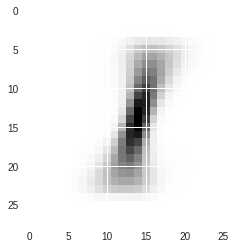

In [0]:
import numpy as np
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
    pic2=X_train1[i,:,:]
    pic=pic+pic2
pic=(pic/X_train1.shape[0])
plt.imshow(pic)

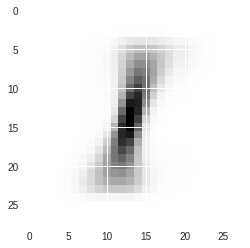

In [0]:
for i in range(pic.shape[0]):
    if i<20:
        pic[:,i]=pic[:,i+1]
    plt.imshow(pic)

In [0]:
model.predict(pic.reshape(1,784)/255)

array([[0.0035322 , 0.41135082, 0.00784975, 0.00352904, 0.00087846,
        0.01684994, 0.02631483, 0.0006783 , 0.5281616 , 0.00085507]],
      dtype=float32)